In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as fit

In [2]:
L = 6
D = 16 * 10 ** (-6)
S = np.pi * D ** 2 / 4

In [3]:
def linear(x, a, b):
    return a * x + b

In [15]:
data = pd.read_csv('Test1.csv', delimiter=';', names=['t', 'V_sa', 'V_sh', 'I', 'R_sa', 'T'], header=2, dtype=np.float64)
data

,t,V_sa,V_sh,I,R_sa,T
0,71.520,0.678067,0.000698,0.093109,7.28254,294.106
1,72.480,0.679796,0.000699,0.093157,7.29729,294.117
2,73.400,0.679752,0.000700,0.093307,7.28510,294.124
3,74.199,0.679562,0.000700,0.093350,7.27973,294.133
4,75.001,0.679611,0.000699,0.093211,7.29113,294.142
...,...,...,...,...,...,...
1445,1368.600,0.481770,0.000699,0.093171,5.17084,235.525
1446,1369.500,0.481549,0.000698,0.093090,5.17293,235.464
1447,1370.300,0.481276,0.000699,0.093194,5.16424,235.409
1448,1371.100,0.481378,0.000698,0.093064,5.17257,235.355


In [44]:
(data['T'] > 293).sum()

73

In [48]:
data['R_sa'][74]

7.31159

In [38]:
(data['T'] > 272).sum()

1072

In [55]:
a, b = fit(linear, data['T'], data['R_sa'])[0]
a, b

(0.03686882240232352, -3.465146353494701)

In [57]:
a / 7.4

0.004982273297611286

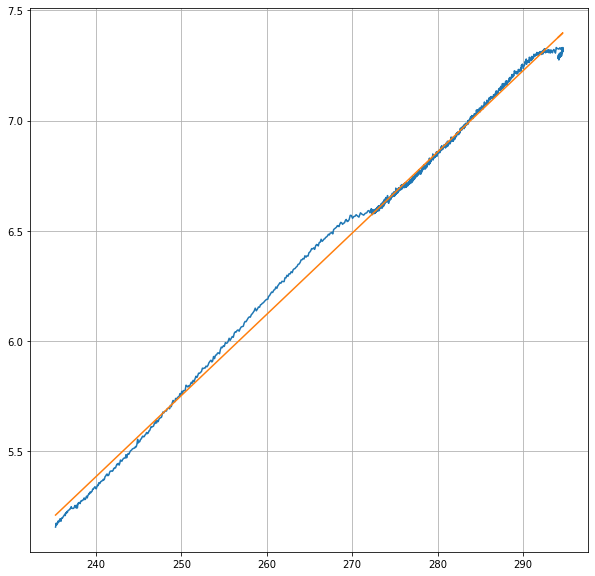

In [58]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'], data['R_sa'])
plt.plot(data['T'], a * data['T'] + b)
plt.grid()
plt.show()

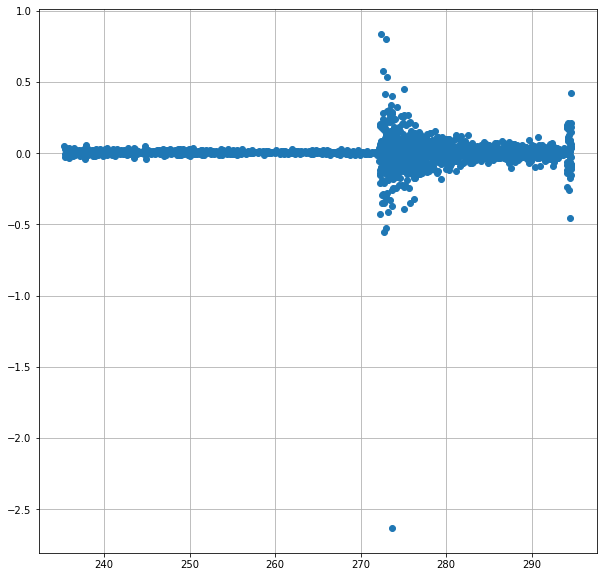

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'][1:], rho, 'o')
plt.grid()
plt.show()

In [59]:
data_heat = pd.read_csv('Test2.csv', delimiter=';', names=['t', 'V_sa', 'V_sh', 'I', 'R_sa', 'T'], header=2, dtype=np.float64)
data_heat

,t,V_sa,V_sh,I,R_sa,T
0,3.706,0.399312,0.000701,0.093510,4.27026,203.296
1,4.646,0.399275,0.000702,0.093588,4.26630,203.297
2,5.586,0.399320,0.000702,0.093545,4.26877,203.296
3,6.525,0.399273,0.000703,0.093683,4.26197,203.286
4,7.326,0.399385,0.000703,0.093754,4.25994,203.287
...,...,...,...,...,...,...
1996,1795.600,0.682018,0.000702,0.093571,7.28881,291.266
1997,1796.540,0.682184,0.000700,0.093341,7.30847,291.284
1998,1797.480,0.682766,0.000701,0.093501,7.30227,291.294
1999,1798.360,0.682681,0.000702,0.093543,7.29803,291.314


In [64]:
(data_heat['T'] < 123).sum()

377

In [73]:
X_heat = data_heat['T'][400:].values
Y_heat = data_heat['R_sa'][400:].values

In [74]:
a_heat, b_heat = fit(linear, X_heat, Y_heat)[0]
a_heat / 7.5

0.0048551881162285735

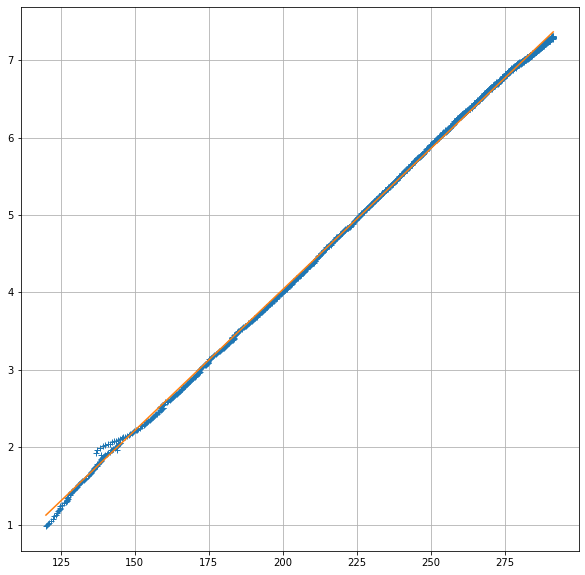

In [75]:
plt.figure(figsize=(10, 10))
plt.plot(data_heat['T'][400:], data_heat['R_sa'][400:], '+')
plt.plot(data_heat['T'][400:], a_heat * data_heat['T'][400:] + b_heat)
plt.grid()
plt.show()